# ライブラリのインポート

In [5]:
import numpy as np
import scipy.stats  as ss
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# データ読み込み

In [21]:
data = pd.read_csv("Baseball.txt",  sep="\t")
#bmi["SEX"].unique() #　カテゴリ変数の値を確認
data

,No.Speed,Distance,Chin-up
1,120,62,71
2,130,90,32
3,95,53,20
4,141,88,28
5,128,79,45
6,118,88,30
7,108,83,22
8,87,53,40
9,120,92,15
10,110,70,10


# カテゴリ変数をダミー変数に変換

In [9]:
data = pd.get_dummies(bmi, drop_first=True)
print(data.head())

     BMI   AGE  BPMEDS  SYSBP  SEX_Male
0  26.97  39.0     0.0  106.0         1
1  28.73  46.0     0.0  121.0         0
2  25.34  48.0     0.0  127.5         1
3  28.58  61.0     0.0  150.0         0
4  23.10  46.0     0.0  130.0         0


# 欠損値検査関数の定義

In [6]:
def lack_table(df): 
    import pandas
    '''
    This function is caliculation of lack values from raw data.
    
    Library: pandas, numpy
    
    params
    ---------
    df : DataFrame
            raw data set.
    
    Returns
    --------
    lack_table_ren_columns: pandas.DataFrame
                            Return results lack of raw data.
    '''Z
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    lack_table = pandas.concat([null_val, percent], axis=1)
    lack_table_ren_columns = lack_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return lack_table_ren_columns

#  欠損値検査

In [23]:
print(lack_table(data))

          欠損数    %
BMI         0  0.0
AGE         0  0.0
BPMEDS      0  0.0
SYSBP       0  0.0
SEX_Male    0  0.0


# 欠損値処理

In [30]:
data["BPMEDS"] = data["BPMEDS"].fillna(0).astype(float)
data["SYSBP"] = data["SYSBP"].fillna(data["SYSBP"].median())

In [25]:
print(lack_table(data))

          欠損数    %
BMI         0  0.0
AGE         0  0.0
BPMEDS      0  0.0
SYSBP       0  0.0
SEX_Male    0  0.0


# 散布図作成

In [23]:
X = data[["Distance", "Chin-up"]]
y = data["No.Speed"]

#pd.scatter_matrix(data[["SYSBP", "BMI", "AGE", "BPMEDS", "SEX_Male"]])
#plt.show()

In [25]:
# モデルの設定 Construct a linear regression model
model = sm.OLS(y, sm.add_constant(X))

# ラベル名を用いるときのモデルの設定 Construct a linear regression model
#model = smf.ols(formula = "damage ~ distance", data = data)

# 回帰分析の実行 Execute linear  regression 
results = model.fit()

# 結果を表示　Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               No.Speed   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     6.965
Date:                Tue, 18 Dec 2018   Prob (F-statistic):            0.00617
Time:                        17:00:28   Log-Likelihood:                -74.989
No. Observations:                  20   AIC:                             156.0
Df Residuals:                      17   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.4425     18.529      2.614      0.0

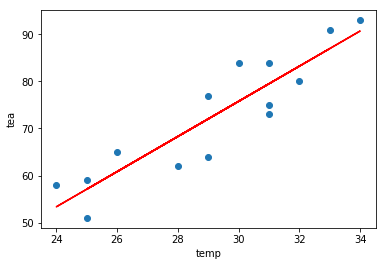

101.9405286343613


In [12]:
b = results.params[0] # 回帰式の切片 Intercept
a = results.params[1] # 回帰式の傾き Regression coefficient

plt.scatter(x,y) # 散布図をプロット Scatter plot
plt.plot(x, a*x+b, color="red") # 回帰直線をプロット  Plot regression line
plt.xlabel("temp")
plt.ylabel("tea")
plt.show()
print(a*37+b)

# 重回帰分析(sklearn)

In [24]:
reg = linear_model.HuberRegressor()


reg.fit(X, y)

#　回帰係数 regression coefficient
print("回帰係数(regression coefficinet)")
print(pd.DataFrame({"Name":X.columns, "Coefficients":reg.coef_}))
# 切片 intercept
print("切片 (intercept)", reg.intercept_)

回帰係数(regression coefficinet)
       Name  Coefficients
0  Distance      0.760107
1   Chin-up      0.448625
切片 (intercept) 45.1052852268216
